In [ ]:
using Pkg
Pkg.add("Distributions")
using Pkg
Pkg.add("Random")
using Pkg
Pkg.add("Plots")

#### Standard Deviation function

In [1]:
function stdDev(samples)
    samples_mean = mean(samples)
    samples_size = length(samples)
    samples = map(x -> (x - samples_mean)^2, samples)
    samples_sum = sum(samples)
    samples_std = sqrt(samples_sum / (samples_size - 1))
    return samples_std
end

stdDev (generic function with 1 method)

In [2]:
using Random
using Distributions
using Plots

# Question 1

To sample from cauchy, we shall implement importance sampling and use normal. We return values from the estimator simplified expression, and we get it as an array. We solve the variance each time, and hence we find if the variance is increasing or decreasing.

In [3]:
function cauchyImportance(mu, sigma)
    randval = rand(Normal(mu, sigma))
    estimator = randval*sigma*((2/pi)^0.5)*exp(((randval - mu)/sigma)^2)/(1+randval^2)
    return estimator
end

cauchyImportance (generic function with 1 method)

The mean after 10,000 tries is: 170.33156758387778
The variance after 10,000 tries is: 4.3836589087631214e8


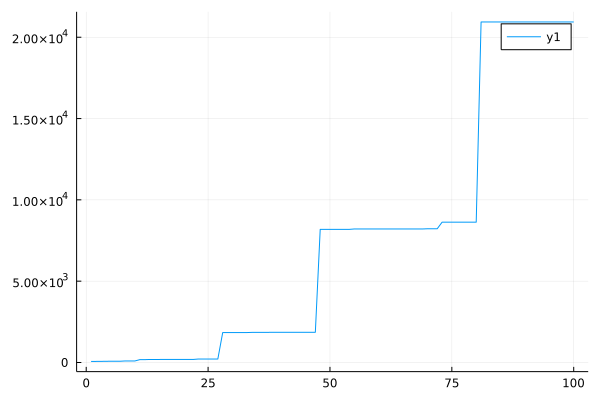

In [4]:
using Distributions

res = Array{Float64,1}(undef, 10000)
vars = Array{Float64, 1}(undef, 100)
index = 1

for i in 1:10000
    res[i] = cauchyImportance(0, 5)
    if i%100 == 0
        vars[index] = stdDev(res)
        index = index + 1
    end
end
println("The mean after 10,000 tries is: ", mean(res))
println("The variance after 10,000 tries is: ", stdDev(res)^2)

plot(vars)

From the plot of variance for some certain values, we see the variance increases as number of terms increase. Therefore, the variance will tend to infinity. Hence, the estimator will have infinite variance.

# Question 2

A.
Given sup f(x)/g(x) is finite. Then using the necessary condition for variance, we get weighted variance:

var(theta) = sigma_g * (1 + var(w(z)) / E(w(z))^2)

given sigma g is finite. Also, since we get  sup as finite, we can see Expectation will be finite. However, we know cauchy has finite expectation but infinite variance. Therefore, we cannot say variance will be finite. Therefore, variance of weighted importance sample can be infinite. 


B. 
Let us say the the weighted importance estimator has infinite variance. In that case, the estimator will be less efficient as the values are not concentrated. Therefore, we will see there is no benifit as compared to accept reject sampling, where there will also be less possibility to accept values if variance is infinite.

# Question 3

We are initially taking data from n=50 terms. From that, we use pi(Z)/g(Z). Here pi will be the given function, but g will be the normal function pdf. Therefore, we will be left with only the product. That will return the weights only. We will multiply with the rand val sampled from normal to get the weights with h(Z). We will then use the necessary condition to get the folloeing.

In [5]:
Random.seed!(1)

function returnTarget(v, x)
    ret = 1
    for i in 1:50
        randval = rand(TDist(v))
        ret = ret * ( (1 + ( (randval - x)^2 )/v )^((v+1)/2) )
    end
    ret = ret*(pi*2)^0.5
    return ret
end

returnTarget (generic function with 1 method)

The variance after 100,000 tries is: 1.9430700576415463e11
1.656708167629688e11
1.6534891267323087e11
1.653489126732291e11
1.653489126732291e11
1.6534891261798203e11
2.0544575802187427e11
2.0544575802187427e11
2.0544485050777634e11
2.0544485050777634e11
2.0544485050777634e11
2.0544485050777634e11
2.0544485050777634e11
2.0544485050777634e11
2.0544485050777634e11
2.0544485050777634e11
2.0544485050777634e11
2.0544485050777634e11
2.054448505077645e11
2.0544485047183264e11
2.0544485047183264e11


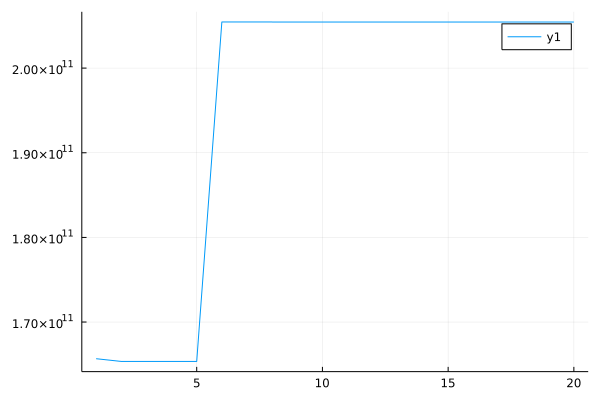

In [14]:
weight = Array{Float64,1}(undef, 100000)
wWithHs = Array{Float64, 1}(undef, 100000)
vars2 = Array{Float64, 1}(undef, 20)
index = 1

for i in 1:100000
    randval = rand(Normal(0, 1))
    weight[i] = returnTarget(5, randval)
    wWithHs[i] = weight[i]*randval
    if i%5000 == 0
        vars2[index] = ( (stdDev(wWithHs)^2) / (mean(weight)^2) )*( 1 + (stdDev(weight) / mean(weight) )^2 )
        index = index + 1
    end
end

variance = ( (stdDev(wWithH)^2) / (mean(weights)^2) )*( 1 + (stdDev(weights) / mean(weights) )^2 )



println("The variance after 100,000 tries is: ",variance)
for i in 1:20
    println(vars2[i])
end
plot(vars2)

From the plots, we see that the variance remains more or less constant.

When v = 1, 2:

In [9]:
weights = Array{Float64,1}(undef, 100000)
wWithH = Array{Float64, 1}(undef, 100000)


for i in 1:100000
    randval = rand(Normal(0, 1))
    weights[i] = returnTarget(1, randval)
    wWithH[i] = weights[i]*randval
end

variance = ( (stdDev(wWithH)^2) / (mean(weights)^2) )*( 1 + (stdDev(weights) / mean(weights) )^2 )
println("The variance after 100,000 tries when v = 1 is: ",variance)

for i in 1:100000
    randval = rand(Normal(0, 1))
    weights[i] = returnTarget(2, randval)
    wWithH[i] = weights[i]*randval
end

variance = ( (stdDev(wWithH)^2) / (mean(weights)^2) )*( 1 + (stdDev(weights) / mean(weights) )^2 )
println("The variance after 100,000 tries when v = 2 is: ",variance)

The variance after 100,000 tries when v = 1 is: 1.223420977491935e11
The variance after 100,000 tries when v = 2 is: 1.7002295488479623e11


# Question 4

Here, we used prior as gamma. we then see 

pi(lambda/y) = beta^alpha / gamma(alpha) * lambda^(alpha-1) * exp(-beta*lambda) * prod( lambda^y_i * exp(-lambda) / (y_i)!)

We see, here, if the y_i 's are constants, then we see, the equation is same as  gamma function. Therefore, the posterior 
distribution will also be gamma function with shifted centre.